In [1]:
import numpy as np
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
#from tensorflow.keras.preprocessing.image import ImageDataGenera
import random
import matplotlib.pyplot as plt

DATASET

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
X_train =  (np.loadtxt( 'MNIST_CSV[1]/mnist_train.csv' , delimiter=','))/255
X_test =  (np.loadtxt( 'MNIST_CSV[1]/mnist_test.csv' , delimiter=','))/255

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [7]:
print("Shape of X_train: ", train_images.shape)
print("Shape of X_test: ", train_labels.shape)
print("Shape of X_train: ", test_images.shape)
print("Shape of X_test: ", test_labels.shape)

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (60000,)
Shape of X_train:  (10000, 28, 28)
Shape of X_test:  (10000,)


In [8]:
print(train_images[1,:])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

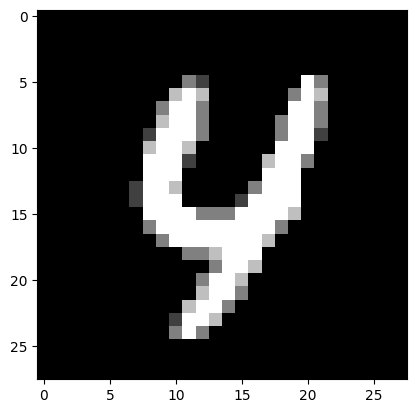

In [23]:
idx = random.randint(0, len(X_train))
plt.imshow(train_images[idx, :] ,cmap='grey')
plt.show()

MODEL

In [37]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape =(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10,activation='softmax')
])

C:\Users\kashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8850 - loss: 0.3744 - val_accuracy: 0.9843 - val_loss: 0.0549
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9824 - loss: 0.0573 - val_accuracy: 0.9869 - val_loss: 0.0399
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9887 - loss: 0.0368 - val_accuracy: 0.9860 - val_loss: 0.0419
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9887 - val_loss: 0.0318
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9905 - val_loss: 0.0288


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 1s - 3ms/step - accuracy: 0.9905 - loss: 0.0288
Test accuracy: 0.9904999732971191


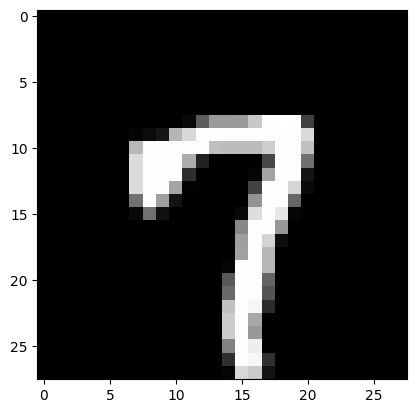

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[4.8045489e-08 3.8141387e-08 1.4020350e-09 5.1049405e-09 4.2112424e-06
  1.3754195e-07 2.1085174e-12 9.9998903e-01 8.8501089e-08 6.4447649e-06]]
7


In [99]:
index=random.randint(0, len(test_labels))
plt.imshow(test_images[index,:],cmap='grey')
plt.show()

y_pred=model.predict(test_images [index,:].reshape(1,28,28,1))
print(y_pred)

"""out=[x*10 for x in y_pred]
print(out)
print(out[0][2])"""
for i in range(10):
    if(y_pred[0][i]>=0.5):
        print(i)
